In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [31]:
# Load the data
data_with_coords = pd.read_csv("E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/all_leks_scores_for_model.csv")
data = data_with_coords.drop(columns = ['lek', 'y_northing', 'x_easting'])
# Display the first few rows of the data
data.head()

,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,still_active
0,0.943,167.491,0.636,140.830,0.716,260.405,0.562,4559.015,0.000,90.000,0.000,705.637,1
1,0.956,184.784,0.762,561.526,0.759,937.547,0.479,21864.279,0.000,93.235,0.000,10.003,0
2,0.953,179.758,0.685,266.422,0.684,400.308,0.276,20.672,0.000,371.736,0.000,263.417,1
3,0.928,147.268,0.663,147.307,0.829,225.527,0.955,654.332,0.074,1106.272,0.259,4138.710,1
4,0.919,139.995,0.604,85.953,0.773,326.898,0.772,3050.212,0.000,6.667,0.010,221.201,1


In [52]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('still_active', axis=1)
y = data['still_active']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42) #test size orginally 0.3

In [53]:
# Now you can get the indices of the rows in the original dataset
train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()

testing_df = data.loc[test_indices]
#print("Training set indices:", train_indices)
print("\nTesting set:")
testing_df.head()


Testing set:


,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,still_active
803,0.987,239.181,0.288,4939.808,0.033,2510.445,0.0,65421.664,1.000,0.000,0.102,0.000,0
1023,0.990,283.035,0.394,3138.381,0.062,5190.398,0.0,11335.526,0.128,48.270,0.620,20.527,0
151,0.821,157.064,0.006,809.563,0.000,1812.533,0.0,11884.583,0.035,96.000,0.000,244.803,0
527,0.986,243.491,0.343,1404.709,0.073,458.713,0.0,1360.931,1.000,174.885,0.960,48.001,1
181,0.926,322.923,0.017,888.558,0.001,4759.398,0.0,14189.995,1.000,0.000,0.292,28.000,1


In [54]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42, early_stopping_rounds=10)
stq_model.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.58911
[1]	validation_0-logloss:0.55772
[2]	validation_0-logloss:0.52841
[3]	validation_0-logloss:0.52018
[4]	validation_0-logloss:0.50858
[5]	validation_0-logloss:0.49851
[6]	validation_0-logloss:0.49846
[7]	validation_0-logloss:0.49685
[8]	validation_0-logloss:0.49718
[9]	validation_0-logloss:0.49205
[10]	validation_0-logloss:0.49677
[11]	validation_0-logloss:0.49076
[12]	validation_0-logloss:0.48538
[13]	validation_0-logloss:0.48621
[14]	validation_0-logloss:0.48714
[15]	validation_0-logloss:0.48513
[16]	validation_0-logloss:0.48487
[17]	validation_0-logloss:0.48393
[18]	validation_0-logloss:0.48832
[19]	validation_0-logloss:0.49196
[20]	validation_0-logloss:0.49195
[21]	validation_0-logloss:0.49005
[22]	validation_0-logloss:0.49322
[23]	validation_0-logloss:0.48673
[24]	validation_0-logloss:0.48880
[25]	validation_0-logloss:0.48895
[26]	validation_0-logloss:0.48635


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 76.34%


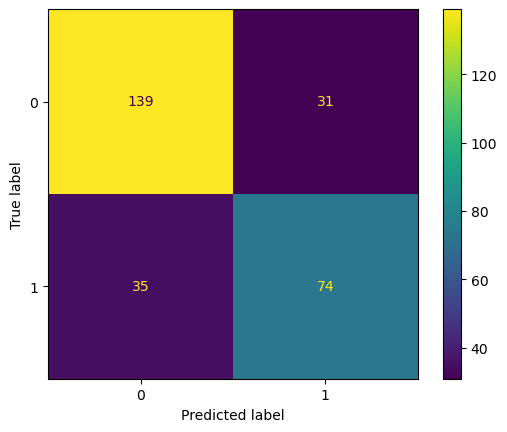

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate accuracy
accuracy_og = stq_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy_og * 100.0))
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [11]:
from sklearn.model_selection import GridSearchCV
"""
param_grid_1 = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}
"""
 # the original
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [0],
    "reg_lambda" : [1],
    "scale_pos_weight" : [5, 7, 9],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}

"""
# the new one to test
param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.01, 0.001],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [2.95],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}
"""
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                              early_stopping_rounds = 10,
                             seed = 42,
                             subsample = 0.7,
                             colsample_bytree = 0.5),
    param_grid = param_grid_1,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0, 'scale_pos_weight': 5}


c:\Users\Justin\miniconda3\envs\graph_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [56]:
#compare to xgboost_env_test notebook
#https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            early_stopping_rounds = 10,
                            seed = 42, 
                            max_depth = 5, # how deep the tree will go
                            learning_rate = 0.1, # also known as eta
                            gamma = 0, # originally 
                            reg_lambda = 1, # was set to 
                            scale_pos_weight = 1.56, #sum(negative instances) / sum(positive instances) - was set to 2.95
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.66626
[1]	validation_0-logloss:0.64366
[2]	validation_0-logloss:0.62450
[3]	validation_0-logloss:0.60675
[4]	validation_0-logloss:0.59068
[5]	validation_0-logloss:0.58087
[6]	validation_0-logloss:0.56974
[7]	validation_0-logloss:0.55825
[8]	validation_0-logloss:0.54749
[9]	validation_0-logloss:0.53733
[10]	validation_0-logloss:0.53099
[11]	validation_0-logloss:0.52404
[12]	validation_0-logloss:0.52051
[13]	validation_0-logloss:0.51410
[14]	validation_0-logloss:0.50941
[15]	validation_0-logloss:0.50580
[16]	validation_0-logloss:0.50593
[17]	validation_0-logloss:0.50072
[18]	validation_0-logloss:0.49888
[19]	validation_0-logloss:0.49535
[20]	validation_0-logloss:0.49475
[21]	validation_0-logloss:0.49452
[22]	validation_0-logloss:0.49074
[23]	validation_0-logloss:0.48737
[24]	validation_0-logloss:0.48662
[25]	validation_0-logloss:0.48530
[26]	validation_0-logloss:0.48651
[27]	validation_0-logloss:0.48585
[28]	validation_0-logloss:0.48532
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

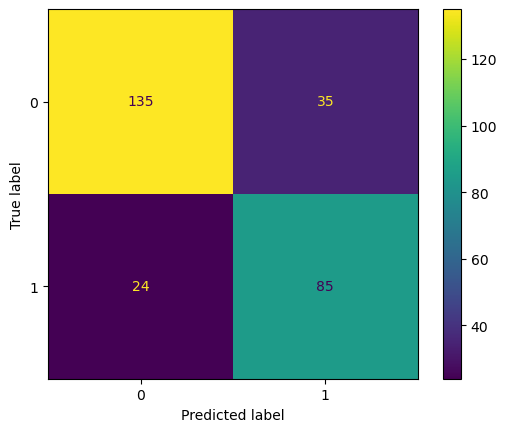

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [58]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.85%


In [59]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

### Finding and exportin gthe correctly and incorrectly tested data

In [29]:
folder_directory = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/all_leks_metrics/redone/xgb_model_predictions"
# Make predictions on the test dataset
#y_pred = stq_model_2.predict(X_test)
#predict proba
y_pred = stq_model_2.predict_proba(X_test)

# Compare the predicted labels with the actual labels
correctly_predicted_indices = (y_pred == y_test)
incorrectly_predicted_indices = ~correctly_predicted_indices

# Extract rows with correct and incorrect predictions
correctly_predicted_rows = X_test[correctly_predicted_indices]
incorrectly_predicted_rows = X_test[incorrectly_predicted_indices]

# Filter original target binary classification data
original_target_correct = y_test[correctly_predicted_indices]
original_target_incorrect = y_test[incorrectly_predicted_indices]

# Concatenate original target with correctly and incorrectly predicted rows
correctly_predicted_rows_with_target = pd.concat([correctly_predicted_rows, original_target_correct], axis=1)
incorrectly_predicted_rows_with_target = pd.concat([incorrectly_predicted_rows, original_target_incorrect], axis=1)

#print("Rows predicted correctly with original target:")
#print(correctly_predicted_rows_with_target)

#print("\nRows predicted incorrectly with original target:")
#print(incorrectly_predicted_rows_with_target)

# Sort the row indices
correctly_predicted_rows_with_target_sorted = correctly_predicted_rows_with_target.sort_index()
incorrectly_predicted_rows_with_target_sorted = incorrectly_predicted_rows_with_target.sort_index()

correctly_predicted_rows_with_target_sorted.head()

,max_dsp_hub_score,max_dsp_centrality_score,avg_dsp_hub_score,avg_dsp_centrality_score,rnd_trip_hub_score,rnd_trip_centrality_score,hr_hub_score,hr_centrality_score,k_hub_score,k_centrality_score,k2_hub_score,k2_centrality_score,still_active
3,0.928,147.268,0.663,147.307,0.829,225.527,0.955,654.332,0.074,1106.272,0.259,4138.710,1
4,0.919,139.995,0.604,85.953,0.773,326.898,0.772,3050.212,0.000,6.667,0.010,221.201,1
10,0.898,125.429,0.568,72.616,0.751,146.754,0.236,2618.178,0.000,0.000,0.000,2304.000,1
12,0.992,281.603,0.929,3897.664,0.530,4867.593,0.000,33111.856,0.744,8.000,0.000,0.000,1
20,0.711,1589.449,0.000,14.523,0.000,135.073,0.000,3260.387,0.500,0.000,1.000,78.000,0


In [30]:
# finding the indices of only the correctly predicted testing data from the original dataframe
correctly_predicted_indices = correctly_predicted_rows_with_target_sorted.index.tolist()
correctly_predicted = data_with_coords.loc[correctly_predicted_indices]
#correctly_predicted
# Define the file path where you want to save the CSV file
correct_pred_csv_file_path = f"{folder_directory}/cor_pred_testing.csv"

# Export the DataFrame to a CSV file
correctly_predicted.to_csv(correct_pred_csv_file_path, index=False)


# finding the indices of only the incorrectly predicted testing data from the original dataframe
incorrectly_predicted_indices = incorrectly_predicted_rows_with_target_sorted.index.tolist()
incorrectly_predicted = data_with_coords.loc[incorrectly_predicted_indices]
#incorrectly_predicted
# Define the file path where you want to save the CSV file
incorrect_pred_csv_file_path = f"{folder_directory}/incor_pred_testing.csv"

# Export the DataFrame to a CSV file
incorrectly_predicted.to_csv(incorrect_pred_csv_file_path, index=False)

print("CSV files have been successfully saved.")

CSV files have been successfully saved.


In [60]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.45116954706026047

In [61]:
from sklearn.metrics import classification_report
import shap

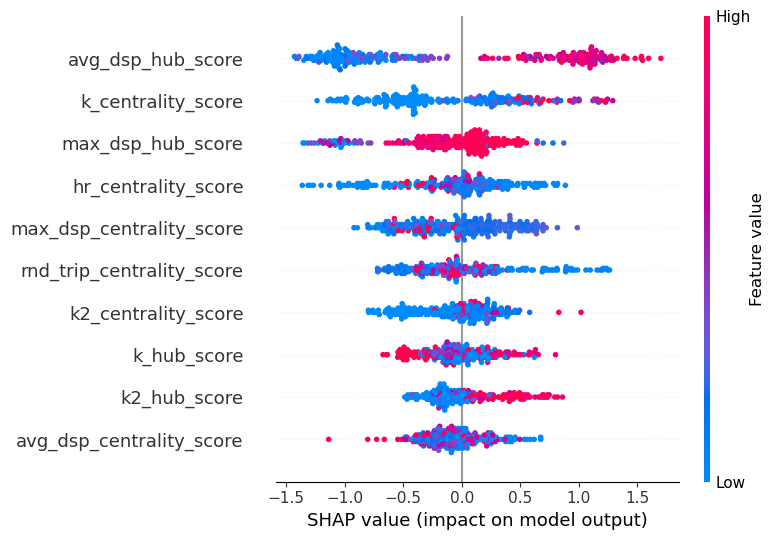

In [62]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

In [ ]:
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df_sorted = shap_df.sort_index()

X_test_sort = X_test.sort_index()
# Concatenate SHAP values DataFrame with the testing DataFrame
testing_df_with_shap = pd.concat([X_test_sort, shap_df_sorted, axis = 1])

print("Testing DataFrame with SHAP values:")
testing_df_with_shap

In [ ]:
feature_names = X_test.columns


rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

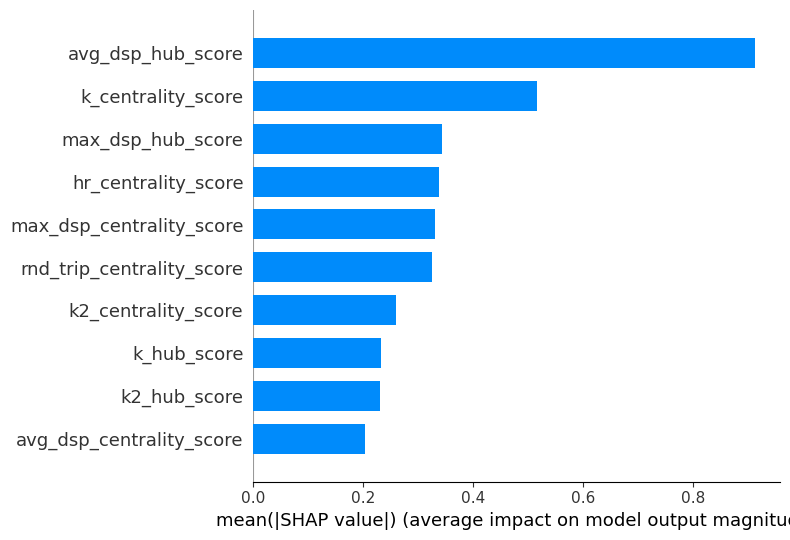

In [63]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display = 10)

# Testing a Random Forests model

In [64]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       190
           1       0.65      0.80      0.72        89

    accuracy                           0.80       279
   macro avg       0.77      0.80      0.78       279
weighted avg       0.82      0.80      0.80       279



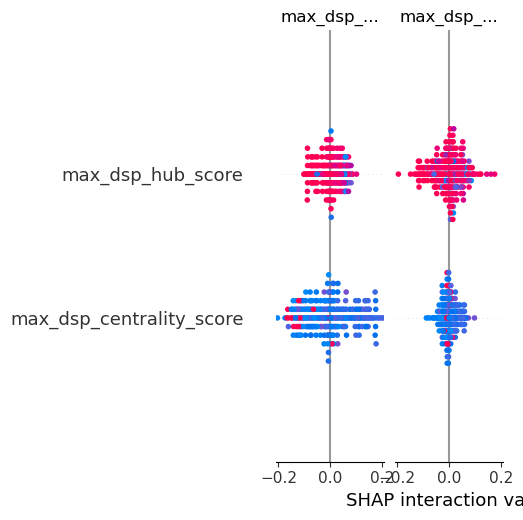

In [65]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(clf).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 5)